In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [6]:
df=df=pd.read_csv('SalaryData.csv')

In [7]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [8]:
df.shape

(40, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40,NaN,NaN,NaN,162187,64860.4,50103,99897.5,169100,214441,260151


In [11]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [12]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

# Formulate the Null and Alternate Hypothesis (for Education)


**Null Hypothesis : The mean Salary of different individuals is same with different Levels of Education**

**Alternate Hypothesis : The mean Salary of different Individuals  is different in at-least one Level of Education**


In [13]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Conclusion: Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that there is a difference in the mean salary of individuals in atleast at-least one level of Education

# Formulate the Null and Alternate Hypothesis (for Education)


**Null Hypothesis : The mean Salary of different individuals is same with different Occupationa**

**Alternate Hypothesis : The mean Salary of different Individuals  is different in occupation**


In [14]:
formula = 'Salary ~ C(Occupation)'
model1 = ols(formula, df).fit()
aov_table = anova_lm(model1)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Conclusion: Since the p value is more than the significance level (0.05), we cannot reject the null hupothesis and conclude that there is NO difference in the mean salary of individuals in differnt occupations

<AxesSubplot:xlabel='Education', ylabel='Salary'>

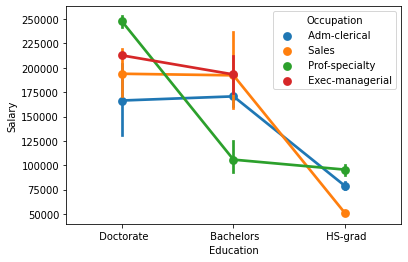

In [15]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation')

<AxesSubplot:xlabel='Education', ylabel='Salary'>

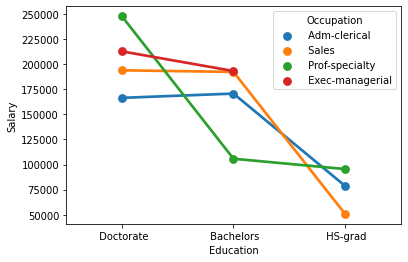

In [17]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None)

In [40]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model2 = ols(formula, df).fit()
aov_table = anova_lm(model2)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  
